In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_file = "data/mouse_drug_data.csv"
clinical_trial_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_data_file)
clinical_trial_df = pd.read_csv(clinical_trial_file)

# Combine the data into a single dataset

combined_trial_df = pd.merge(clinical_trial_df,mouse_data_df, 
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trial_data = combined_trial_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

# Convert to DataFrame

total_volume_data =trial_data.groupby(['Drug','Timepoint'], as_index = False)['Tumor Volume (mm3)'].mean()
tumor_response_data = pd.DataFrame(total_volume_data)

# Preview DataFrame

tumor_response_data.head(5)




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_data = combined_trial_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
mean_tumor_volume_ste = combined_trial_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
error_data_df = pd.DataFrame(mean_tumor_volume_ste).reset_index()
# Convert to DataFrame

# result = error_data.groupby(['Drug','Timepoint'], as_index=False).agg(
#                       {'Tumor Volume (mm3)':'sem'})
# error_data_df = pd.DataFrame(result)
error_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

# df.pivot_table('no of medals', ['Year', 'Country'], 'medal')
mean_data_pivot_table = combined_trial_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
mean_data_pivot_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# df.pivot_table('no of medals', ['Year', 'Country'], 'medal')
sem_error_pivot_table = error_data_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
sem_error_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


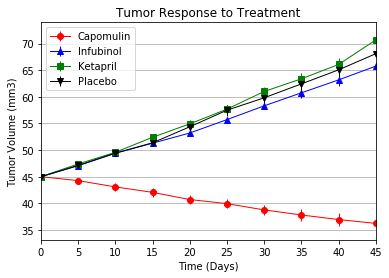

In [6]:
# Generate the Plot (with Error Bars)
sem_pivot = sem_error_pivot_table[['Capomulin', 'Infubinol','Ketapril','Placebo']]
drug_data = mean_data_pivot_table[['Capomulin', 'Infubinol','Ketapril','Placebo']]
ax1 = drug_data['Capomulin'].plot(kind='line', yerr = sem_pivot['Capomulin'], linewidth=1, marker= 'o', color='red', label ='Capomulin')
ax2 = drug_data['Infubinol'].plot(kind='line',yerr = sem_pivot['Infubinol'],linewidth=1, marker= '^', color='blue', label = 'Infubinol')
ax3 = drug_data['Ketapril'].plot(kind='line',yerr = sem_pivot['Ketapril'], linewidth=1, marker= 's', color='green', label='Ketapril')
ax4 = drug_data['Placebo'].plot(kind='line',yerr = sem_pivot['Placebo'], linewidth=1, marker= 'v', color='black', label='Placebo')
plt.legend(loc='upper left')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.axes().yaxis.grid()

# Save the Figure
plt.savefig("../Images/treatment.png")

# Show the chart
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_data = combined_trial_df[['Drug', 'Timepoint', 'Metastatic Sites']]

# Convert to DataFrame

mean_met_data=met_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
met_response_mean_data = pd.DataFrame(mean_met_data)

# Preview DataFrame

met_response_mean_data.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error_data = combined_trial_df[['Drug', 'Timepoint', 'Metastatic Sites']]

# Convert to DataFrame

error_data = met_error_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
met_error_data_df = pd.DataFrame(error_data)

# Preview DataFrame
met_error_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_raws_to_column = met_response_mean_data.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
met_mean_raws_to_column.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_error_raws_to_column = met_error_data_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
met_error_raws_to_column.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


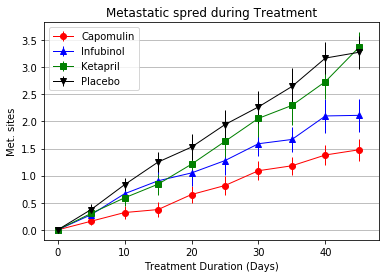

In [11]:
# Generate the Plot (with Error Bars)
met_sem_pivot = met_error_raws_to_column[['Capomulin', 'Infubinol','Ketapril','Placebo']]
met_drug_data = met_mean_raws_to_column[['Capomulin', 'Infubinol','Ketapril','Placebo']]
ax1 = met_drug_data['Capomulin'].plot(kind='line', yerr = met_sem_pivot['Capomulin'], linewidth=1, marker= 'o', color='red', label ='Capomulin')
ax2 = met_drug_data['Infubinol'].plot(kind='line',yerr = met_sem_pivot['Infubinol'],linewidth=1, marker= '^', color='blue', label = 'Infubinol')
ax3 = met_drug_data['Ketapril'].plot(kind='line',yerr = met_sem_pivot['Ketapril'], linewidth=1, marker= 's', color='green', label='Ketapril')
ax4 = met_drug_data['Placebo'].plot(kind='line',yerr = met_sem_pivot['Placebo'], linewidth=1, marker= 'v', color='black', label='Placebo')


plt.legend(loc='best')
plt.title("Metastatic spred during Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. sites")
plt.xlim(-2,48)
plt.axes().yaxis.grid()
# Save the Figure
plt.savefig("../Images/Metastat spred.png")
# Show the Figure
plt.show()

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_column = combined_trial_df[['Drug','Timepoint','Mouse ID']]                                    
total_count_data =survival_rates_column.groupby(['Drug','Timepoint'], as_index = False)['Mouse ID'].count()

# Convert to DataFrame
survival_data_df = pd.DataFrame(total_count_data)
survival_data_df = survival_data_df.rename(columns={'Mouse ID' : 'Mouse Count'})
# Preview DataFrame
survival_data_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_data_pivot_table = survival_data_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')
# Preview the Data Frame
survival_data_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


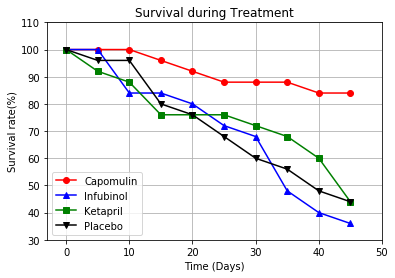

In [14]:

# Generate the Plot (Accounting for percentages)
selected_drug_data = survival_data_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')[['Capomulin', 'Infubinol','Ketapril','Placebo']]
selected_drug_data =selected_drug_data.div(selected_drug_data.iloc[0,0]).multiply(100)
# Preview the Data Frame
selected_drug_data
# Generate the Plot
selected_drug_data.plot(kind ='line', style = ['ro-','b^-','gs-','kv-'])

plt.legend(loc='best')
plt.title("Survival during Treatment")
plt.xlabel("Time (Days)")

plt.ylabel("Survival rate(%)")
plt.xlim(-3,50)
plt.ylim(30,110)
plt.grid()

# Save the Figure
plt.savefig("../Images/Survival Rate.png")
# Show the Figure
plt.show()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

trial_mean_data =combined_trial_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
trial_mean_data

# Preview DataFrame

def first_last(df):
    return df.ix[[0, -1]].pct_change().iloc[[-1]].multiply(100)

percent_change_data = trial_mean_data.groupby(level=0, group_keys=False).apply(first_last).reset_index()

percent_change_df = percent_change_data.drop(['Timepoint'], axis = 1)
percent_change_df

,Drug,Tumor Volume (mm3)
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


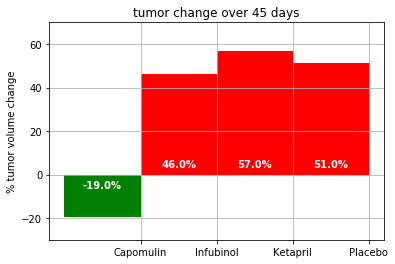

In [16]:
# Store all Relevant Percent Changes into a Tuple

selected_drug = ['Capomulin', 'Infubinol','Ketapril','Placebo']
tuples = [tuple(x) for x in percent_change_df.values if x[0] in selected_drug]

# Orient widths. Add labels, tick marks, etc. 

def select_color(percentage):
    if percentage < 0:
        return 'g'
    else:
        return 'r'

plt.bar(selected_drug, 
        [x[1] for x in tuples],
        align ='center', width=1.0,
        color= [select_color(x[1]) for x in tuples],
        alpha=1.0)

plt.grid()
plt.title("Survival during Treatment")
plt.ylabel("% tumor volume change")
plt.title("tumor change over 45 days")

plt.xticks(np.arange(0.5, 4, step=0.999))


# Use functions to label the percentages of changes

plt.xlim(-0.7,3.7)
plt.ylim(-30,70)

def label_position(percentage):
    if percentage < 0:
        return -5
    else:
        return 5



# Call functions to implement the function calls

for index, (drug, percentage) in enumerate(tuples):
    plt.text(index,
             label_position(percentage),
             str(round(percentage,0)) + '%',
             color='w', fontweight='bold',ha='center', va='center')

# Save the Figure
plt.savefig("../Images/change.png")

# Show the Figure

plt.show()



